In [13]:
import numpy as np
from tnestmodel.datasets import datasets
from tnestmodel.temp_wl import compute_d_rounds
from tnestmodel.temp_fast_graph import SparseTempFastGraph
from nestmodel.graph_properties import number_of_flips_possible
import matplotlib.pyplot as plt

In [14]:
#%load_ext snakeviz

In [108]:
#%%snakeviz --new-tab
convergence_numbers = []
Gs = {}
for dataset in datasets:
    print()
    print(dataset.name, dataset.is_directed)
    E = dataset.read_edges()
    G = SparseTempFastGraph.from_temporal_edges(E, dataset.is_directed)
    Gs[dataset.name] = G
    total_time_diff = np.max(E[:,2])-np.min(E[:,2])
    for f in [0, 0.2, 0.4, 0.6, 0.8, 1.0]:
        if f>0:
            h = int(round(total_time_diff*f))
            s=G.get_temporal_wl_struct(h=h, d=-1)
            convergence_numbers.append((dataset.name, f, len(s.colors_per_round)))
        else:
            its = []
            for g in G.slices:
                #g = g.switch_directions()
                g.ensure_edges_prepared()
                g.calc_wl()
                its.append(len(g.base_partitions))
            print("amax", np.max(its), np.argmax(its), G.times[np.argmax(its)], G.times[np.argmax(its)-1], G.times[np.argmax(its)+1])
            convergence_numbers.append((dataset.name, f, np.max(its)))


opsahl True
amax 3 726 1082770830 1082770540 1082770915

email-eu2 True
amax 3 17084 27507192 27507068 27507702

email-eu3 True
amax 2 0 0 69317577 2635

dnc True
amax 3 2203 1461658514 1461658502 1461658526

highschool_2011 False
amax 5 39 54900 54880 54920

hospital_ward False
amax 6 4984 176860 176840 176880

ht09 False
amax 6 905 21340 21320 21360

workplace_2013 False
amax 4 225 44480 44460 44500


In [57]:
datasets_by_name = {dataset.name : dataset for dataset in datasets}

In [160]:
E = datasets_by_name['ht09'].read_edges()
E = E[E[:,2]==21340 ]

In [161]:
from nestmodel.load_datasets import relabel_edges

In [162]:
E_hospital_176860 = np.array([[1109,1210],
[1210,1658],
[1193,1658],
[1181,1295],
[1205,1245],
[1207,1295],
[1098,1207],
[1193,1207],
[1181,1207],
[1365,1769],
[1142,1193],
[1109,1193],])

In [163]:
E[:,:2]

array([[ 24,  31],
       [ 83,  51],
       [ 12,  17],
       [ 14,  96],
       [ 83,  62],
       [ 17,  51],
       [ 86,  40],
       [ 40,  62],
       [ 31,  61],
       [ 24,  61],
       [ 12,  51],
       [ 79,  87],
       [ 79,  38],
       [ 87,  96],
       [105,  57]], dtype=int64)

In [164]:
E_relabeled = relabel_edges(E[:,:2])
print(len(np.unique(E_relabeled.ravel())))

17


In [165]:
from nestmodel.utils import switch_in_out

In [166]:
from nestmodel.fast_graph import FastGraph

In [167]:
e = np.array(E_relabeled, dtype=np.uint32)
if True:
    e = switch_in_out(e)
    
G = FastGraph(e, is_directed=False)
G.ensure_edges_prepared()
G.calc_wl()
print(G.base_partitions)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  2  1  0  0  0  0  1  0  0  1]
 [ 0  1  0  2  2  1  3  4  5  2  2  3  0  1  2  3  5]
 [ 0  1  0  2  2  1  3  4  5  2  6  3  7  1  8  3  5]
 [ 0  1  0  2  2  1  3  4  5  2  6  7  8  1  9  7  5]
 [ 0  1  0  2  2  1  3  4  5  2  6  7  8  9 10  7  5]]


In [168]:
import pandas as pd

In [169]:
df = pd.DataFrame.from_records(convergence_numbers, columns=["name", "f", "iter"])

In [48]:
np.unique(df["name"])
names = ['opsahl', 'dnc', 'highschool_2011', 'ht09','email-eu2',  'email-eu3',
       'hospital_ward', 'workplace_2013']

color_for_name = {dataset.name : dataset.draw_color for dataset in datasets}

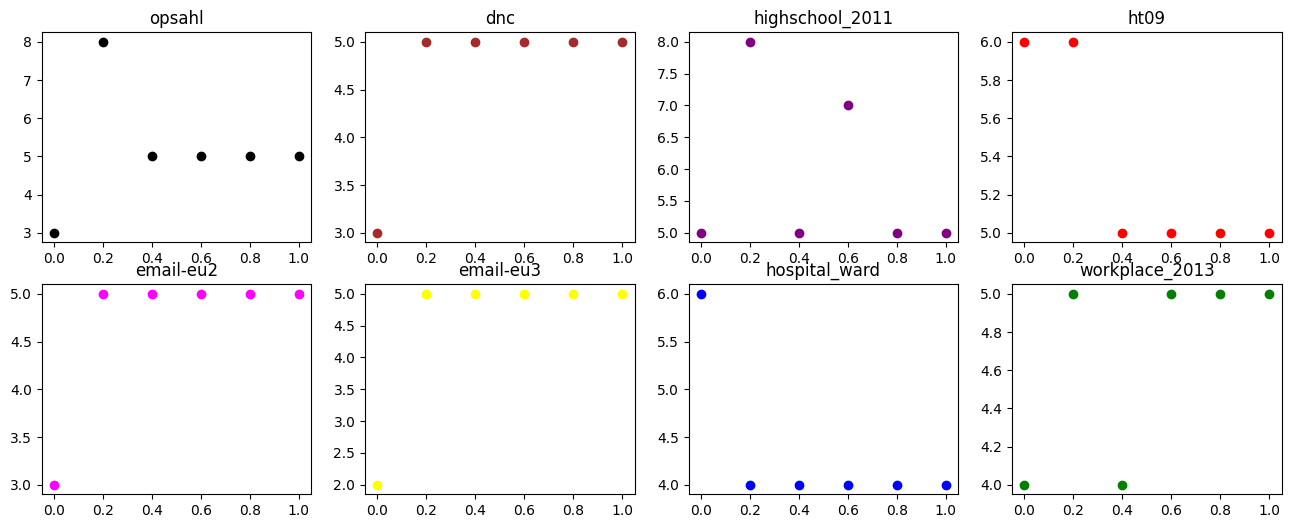

In [51]:
fig, axs = plt.subplots(2, 4, figsize=(16,6))
axs = axs.ravel()

for name, ax in zip(names, axs):
    df2 = df[df.name==name]
    ax.scatter(df2["f"], df2["iter"], color=color_for_name[name])
    ax.set_title(name)
plt.show()

In [7]:
from numpy.testing import assert_array_equal